> **Este cuaderno se encuentra en desarrollo.**

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">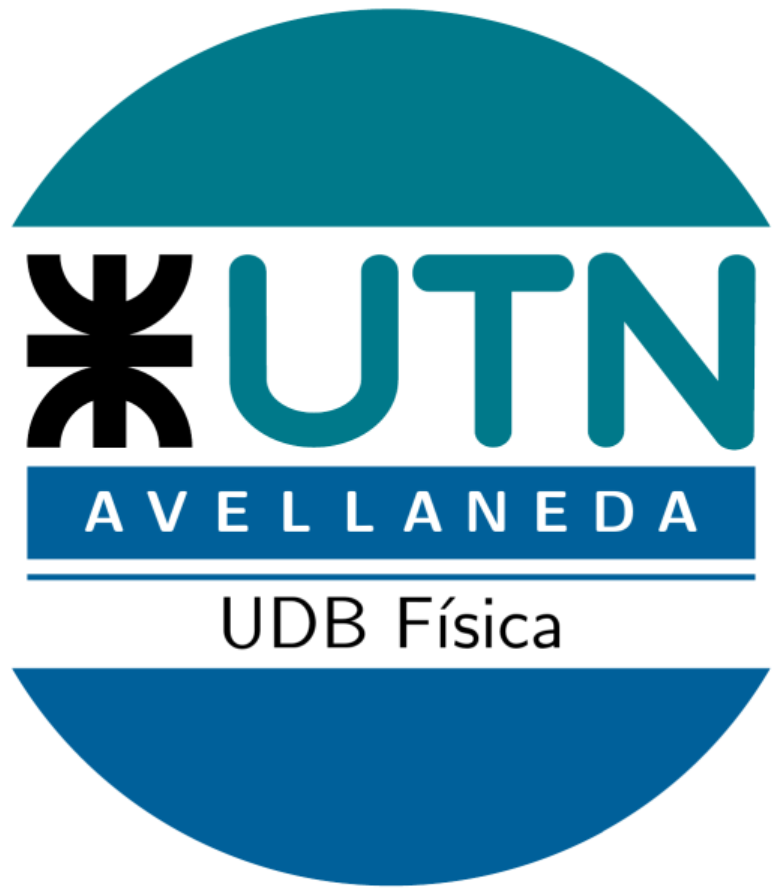</a></td><td style="border:none;"><font face="times" size=4>Física 2<br>2025<br>Electromagnetismo<br>Material de referencia</font></td></tr>
</table> 

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">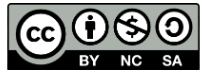</a></td><td style="border:none;"><font face="times" size=4>2025 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font></td></tr>
</table>

# Ejemplos con conductores en dos dimensiones

---
 [1,2].

In [1]:
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
# from scipy import integrate
# from numpy import sqrt, cos, sin, arctan, log, pi, absolute
import sys

import sympy as sm
from sympy import init_printing, Eq, symbols, Symbol, integrate, Integral
init_printing(use_unicode=False, wrap_line=False)


# py.rcParams['mathtext.fontset'] = 'stix'
# py.rcParams.update({'font.size': 14})


np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
# %precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade frautnEM
from frautnEM.puntuales import plotEf, equipotencialesPuntuales, V

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
# %matplotlib widget

Looking in indexes: https://test.pypi.org/simple/


## Intro

Completar.

<!-- <div><image src="img/c2_cilindro.png"  width="400"></div>

<div><image src="img/c2_cilindro_discretizado.png"  width="500"></div> -->


In [2]:
# Mover regionconductor o mejorarla para que sea general.

In [3]:
def Efield2D(x, y, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1],
        [q2,x2,y2],
        ...
        [qN,xN,yN]
    ]
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    Ei,Ej= 0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2)**(3/2)
        Ei = Ei + k * qi[0] * (x - qi[1]) / r
        Ej = Ej + k * qi[0] * (y - qi[2]) / r

    return Ei, Ej

def region_conductor(x,y):
    regionx = np.piecewise(X, [(X > 0) & (X < 0.05), ], [0, 1])
    regiony = np.piecewise(Y, [(Y > 0) & (Y < 0.05), ], [0, 1])
    region = regionx + regiony
    region = np.piecewise(region, [region > 0], [1, 0])

    return region

# Defining custom plotting functions
def my_contourf(x,y,F,ttl,clrmp = 'inferno'):
    cnt = py.contourf(x,y,F,41,norm="log", cmap = clrmp)
    
    # Antialiasing block for exporting figure to pdf later
    # for c in cnt.collections:
        # c.set_edgecolor("face")
    
    cbar = py.colorbar()
    # py.xlabel(r'$x$',fontsize=26); py.ylabel(r'$y$',fontsize=26); 
    py.xlabel(r'$x$'); py.ylabel(r'$y$'); 
    # py.title(ttl)
    # cbar.set_label(ttl,fontsize=26)
    cbar.set_label(ttl)
    # py.xlim([x[0],x[-1]])
    # py.ylim([y[0],y[-1]])
    return 0


## Cuadrado

Conductor cuadrado, problema con simetría en z. La densidad de carga en la superficie es lineal, en curvas sobre el plano xy.


In [4]:
# Parámetros del sistema y numéricos.

a = 0.05    # Lado del cuadrado (m).
V1 = 10      # Potencial en el cuadrado (V).

N = 800     # Cantidad de segmentos (usar múltiplo de 4). 

# No modificar:
Delta = 4*a/N   # Longitud de cada segmento. 

# Si uso esta distancia, el resultado es ~7.5 V enlugar de 10 V.
# d = Delta/100  # Distancia entre las cargas y la superficie.

d = a/100

k = 9E9

In [5]:
# j en lado 1

def Aij_1(row_j):
    ya = (row_j - 1) * Delta
    yb = ya + Delta
    num = yb - yi + np.sqrt((xj-xi)**2+(yb-yi)**2)
    den = ya - yi + np.sqrt((xj-xi)**2+(ya-yi)**2)
    
    return np.log(num/den)

# j en lado 2

def Aij_2(row_j):
    xa = (row_j - 1) * Delta
    xb = xa + Delta
    num = xb - xi + np.sqrt((xb-xi)**2+(yj-yi)**2)
    den = xa - xi + np.sqrt((xa-xi)**2+(yj-yi)**2)
    
    return np.log(num/den)

# j en lado 3

def Aij_3(row_j):
    ya = a - row_j * Delta
    yb = ya + Delta
    num = yb - yi + np.sqrt((xj-xi)**2+(yb-yi)**2)
    den = ya - yi + np.sqrt((xj-xi)**2+(ya-yi)**2)
    
    return np.log(num/den)

# j en lado 4

def Aij_4(row_j):
    xa = a - row_j * Delta
    xb = xa + Delta
    num = xb - xi + np.sqrt((xb-xi)**2+(yj-yi)**2)
    den = xa - xi + np.sqrt((xa-xi)**2+(yj-yi)**2)
    
    return np.log(num/den)


In [6]:
# Preparo la matriz para ir concatenando filas por cada valor de i.
A = np.array([]).reshape(0,N)

row_j = np.array(np.arange(1,int(N/4)+1))

# i en Lado 1:
xi = 0

for i in np.arange(1,int(N/4)+1):
# for i in np.arange(1,2):
    yi = (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

# i en Lado 2:
yi = a

for i in np.arange(1,int(N/4)+1):
    xi = (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

# i en Lado 3:
xi = a

for i in np.arange(1,int(N/4)+1):
    yi = a - (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

# i en Lado 4:
yi = 0

for i in np.arange(1,int(N/4)+1):
    xi = a - (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

A = k*A

print(A.shape)

(800, 800)


In [7]:
# Potencial en los puntos campo:
B = np.ones(N)*V1

# Resuelvo el sistema.
q = np.linalg.solve(A, B)

# Check that the solution is correct:
np.allclose(np.dot(A, q), B)

True

In [8]:
# El resultado es sigma, hay que multiplicar por la longitud de cada segmento:
q = q * Delta

# Se arma la lista de cargas. Las posiciones son los centros de los
# segmentos j de los cálculos anteriores.
i = np.array(np.arange(1,int(N/4)+1))

x = np.ones(int(N/4))*d
xx = (i - 0.5)*Delta
x = np.concatenate([x,xx])
xx = np.ones(int(N/4))*(a-d)
x = np.concatenate([x,xx])
xx = a - (i - 0.5)*Delta
x = np.concatenate([x,xx])

y = (i - 0.5)*Delta
yy = np.ones(int(N/4))*(a-d)
y = np.concatenate([y,yy])
yy = a - (i - 0.5)*Delta
y = np.concatenate([y,yy])
yy = np.ones(int(N/4))*d
y = np.concatenate([y,yy])

x = x.reshape(1,N)
y = y.reshape(1,N)
z = np.zeros(N).reshape(1,N)

Q = np.concatenate([q.reshape(1,N),x,y,z], axis=0)
Q = np.transpose(Q)

In [9]:
Nx = 200
Ny = 200
x = np.linspace(-0.05,0.1,Nx)        # x variables in 1D
y = np.linspace(-0.05,0.1,Ny)        # y variable in 1D
X,Y = np.meshgrid(x,y)          # 2D meshgrid

/tmp/ipykernel_3365/1083495990.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  cbar = py.colorbar()


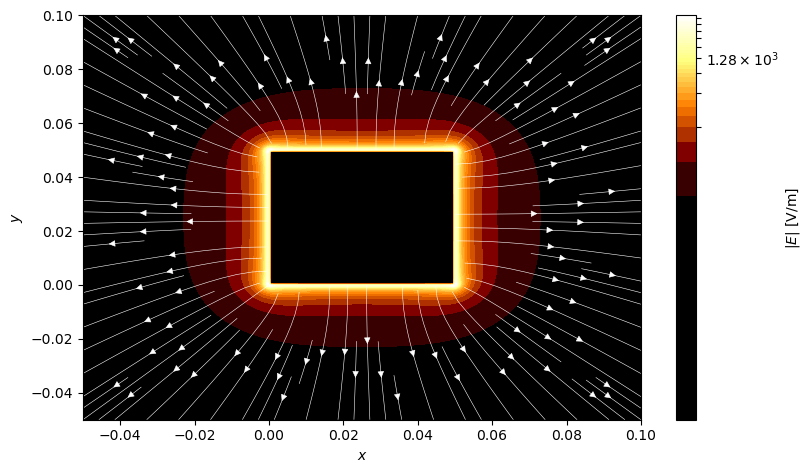

In [10]:
region = region_conductor(X,Y)
Ei, Ej = Efield2D(X,Y,Q)

Ei = Ei * region 
Ej = Ej * region 

Emod = np.sqrt(Ei**2 + Ej**2)

# py.figure(figsize = (12,7))
py.figure(figsize = (9,5.25))
my_contourf(X,Y,Emod,r'$|E|$ [V/m]','afmhot')
py.streamplot(X,Y,Ei,Ej,color = 'w',density = 1.2, linewidth = 0.4)


In [11]:
# Test. Falta mejorar este test, algún gráfico.
# El potencial en un punto sobre la superficie.
V(0.01,a,0,Q)

In [12]:
# Se eligen cuáles equipotenciales mostrar en una lista. 
# niveles = [4,6]

# equipotencialesPuntuales(Q, niveles=niveles, dim=0.055)

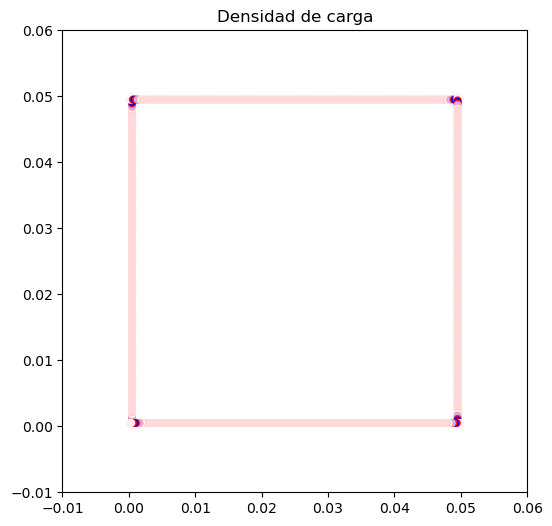

In [ ]:
titulo = "Densidad de carga"
figsize = (6,6)
dq = 0.0005

# Valores entre 0 y 1 para el colormap.
qnorm = (q - np.min(q))/(np.max(q)-np.min(q))
facecolors = plt.cm.bwr(qnorm)
# facecolors = plt.cm.coolwarm(qnorm)

fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
ax.set_title(titulo)
plt.xlim([-0.01,0.06])
plt.ylim([-0.01,0.06])

for n in np.arange(Q.shape[0]):
    _q, xq, yq, zq = Q[n]
    # Different colors for positive and negative charges.
    circ = plt.Circle((xq,yq), dq, color=facecolors[n])
    ax.add_patch(circ)          

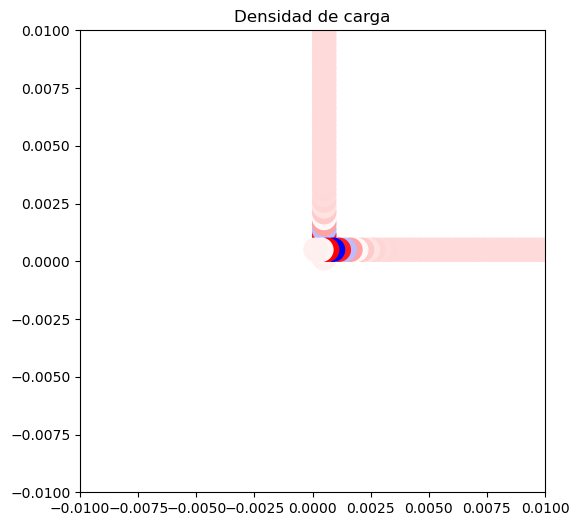

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
ax.set_title(titulo)
plt.xlim([-0.01,0.01])
plt.ylim([-0.01,0.01])

for n in np.arange(Q.shape[0]):
    _q, xq, yq, zq = Q[n]
    # Different colors for positive and negative charges.
    circ = plt.Circle((xq,yq), dq, color=facecolors[n])
    ax.add_patch(circ)          

In [39]:
Q

array([[-6.42393257e-13,  5.00000000e-04,  5.00000000e-05,
         0.00000000e+00],
       [ 1.09602736e-11,  5.00000000e-04,  1.50000000e-04,
         0.00000000e+00],
       [-8.12690165e-11,  5.00000000e-04,  2.50000000e-04,
         0.00000000e+00],
       ...,
       [ 1.29897490e-11,  1.50000000e-04,  5.00000000e-04,
         0.00000000e+00],
       [-7.46345813e-13,  5.00000000e-05,  5.00000000e-04,
         0.00000000e+00],
       [ 1.00000000e-09, -5.00000000e-02,  2.50000000e-02,
         0.00000000e+00]])

## Cuadrado y una carga puntual

In [26]:
# Parámetros del sistema y numéricos.

a = 0.05    # Lado del cuadrado (m).
V1 = 10      # Potencial en el cuadrado (V).

N = 2000     # Cantidad de segmentos (usar múltiplo de 4). 

qq = 1E-9   # Carga puntual (C). 
xqq = -0.05 
yqq = 0.025
zqq = 0

# No modificar:
Delta = 4*a/N   # Longitud de cada segmento. 

# Si uso esta distancia, el resultado es ~7.5 V enlugar de 10 V.
# d = Delta/100  # Distancia entre las cargas y la superficie.

d = a/100

k = 9E9

In [27]:
# j en lado 1

def Aij_1(row_j):
    ya = (row_j - 1) * Delta
    yb = ya + Delta
    num = yb - yi + np.sqrt((xj-xi)**2+(yb-yi)**2)
    den = ya - yi + np.sqrt((xj-xi)**2+(ya-yi)**2)
    
    return np.log(num/den)

# j en lado 2

def Aij_2(row_j):
    xa = (row_j - 1) * Delta
    xb = xa + Delta
    num = xb - xi + np.sqrt((xb-xi)**2+(yj-yi)**2)
    den = xa - xi + np.sqrt((xa-xi)**2+(yj-yi)**2)
    
    return np.log(num/den)

# j en lado 3

def Aij_3(row_j):
    ya = a - row_j * Delta
    yb = ya + Delta
    num = yb - yi + np.sqrt((xj-xi)**2+(yb-yi)**2)
    den = ya - yi + np.sqrt((xj-xi)**2+(ya-yi)**2)
    
    return np.log(num/den)

# j en lado 4

def Aij_4(row_j):
    xa = a - row_j * Delta
    xb = xa + Delta
    num = xb - xi + np.sqrt((xb-xi)**2+(yj-yi)**2)
    den = xa - xi + np.sqrt((xa-xi)**2+(yj-yi)**2)
    
    return np.log(num/den)


In [28]:
# Preparo la matriz para ir concatenando filas por cada valor de i.
A = np.array([]).reshape(0,N)

row_j = np.array(np.arange(1,int(N/4)+1))

# i en Lado 1:
xi = 0

for i in np.arange(1,int(N/4)+1):
# for i in np.arange(1,2):
    yi = (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

# i en Lado 2:
yi = a

for i in np.arange(1,int(N/4)+1):
    xi = (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

# i en Lado 3:
xi = a

for i in np.arange(1,int(N/4)+1):
    yi = a - (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

# i en Lado 4:
yi = 0

for i in np.arange(1,int(N/4)+1):
    xi = a - (i-0.5)*Delta
    # j en lado 1:
    xj = d
    row_A = Aij_1(row_j)
    # j en lado 2:
    yj = a-d
    row_A = np.concatenate([row_A,Aij_2(row_j)])
    # j en lado 3:
    xj = a-d
    row_A = np.concatenate([row_A,Aij_3(row_j)])
    # j en lado 4:
    yj = d
    row_A = np.concatenate([row_A,Aij_4(row_j)])

    A = np.concatenate([A, row_A.reshape(1,N)], axis=0)

A = k*A

print(A.shape)

(2000, 2000)


In [29]:
# Potencial en los puntos campo. Hay que restar el valor del potencial de la carga puntual.
i = np.array(np.arange(1,int(N/4)+1))

x = np.zeros(int(N/4))
xx = (i - 0.5)*Delta
x = np.concatenate([x,xx])
xx = np.ones(int(N/4))*a
x = np.concatenate([x,xx])
xx = a - (i - 0.5)*Delta
x = np.concatenate([x,xx])

y = (i - 0.5)*Delta
yy = np.ones(int(N/4))*a
y = np.concatenate([y,yy])
yy = a - (i - 0.5)*Delta
y = np.concatenate([y,yy])
yy = np.zeros(int(N/4))
y = np.concatenate([y,yy])

# x = x.reshape(1,N)
# y = y.reshape(1,N)
# z = np.zeros(N).reshape(1,N)
z = np.zeros(N)

qqlist = [
    [qq, xqq, yqq, zqq]
]

B = np.ones(N)*V1

for n in np.arange(N):
    B[n] = B[n] - V(x[n], y[n], z[n], qqlist)

# Resuelvo el sistema.
q = np.linalg.solve(A, B)

# Check that the solution is correct:
np.allclose(np.dot(A, q), B)


True

In [30]:
# El resultado es sigma, hay que multiplicar por la longitud de cada segmento:
q = q * Delta

# Se arma la lista de cargas. Las posiciones son los centros de los
# segmentos j de los cálculos anteriores.
i = np.array(np.arange(1,int(N/4)+1))

x = np.ones(int(N/4))*d
xx = (i - 0.5)*Delta
x = np.concatenate([x,xx])
xx = np.ones(int(N/4))*(a-d)
x = np.concatenate([x,xx])
xx = a - (i - 0.5)*Delta
x = np.concatenate([x,xx])

y = (i - 0.5)*Delta
yy = np.ones(int(N/4))*(a-d)
y = np.concatenate([y,yy])
yy = a - (i - 0.5)*Delta
y = np.concatenate([y,yy])
yy = np.ones(int(N/4))*d
y = np.concatenate([y,yy])

x = x.reshape(1,N)
y = y.reshape(1,N)
z = np.zeros(N).reshape(1,N)

Q = np.concatenate([q.reshape(1,N),x,y,z], axis=0)
Q = np.transpose(Q)

# Agrego la carga puntual
Q = np.concatenate([Q,qqlist])

In [31]:
Nx = 200
Ny = 200
x = np.linspace(-0.025,0.075,Nx)        # x variables in 1D
y = np.linspace(-0.025,0.075,Ny)        # y variable in 1D
X,Y = np.meshgrid(x,y)          # 2D meshgrid

/tmp/ipykernel_3365/1083495990.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  cbar = py.colorbar()


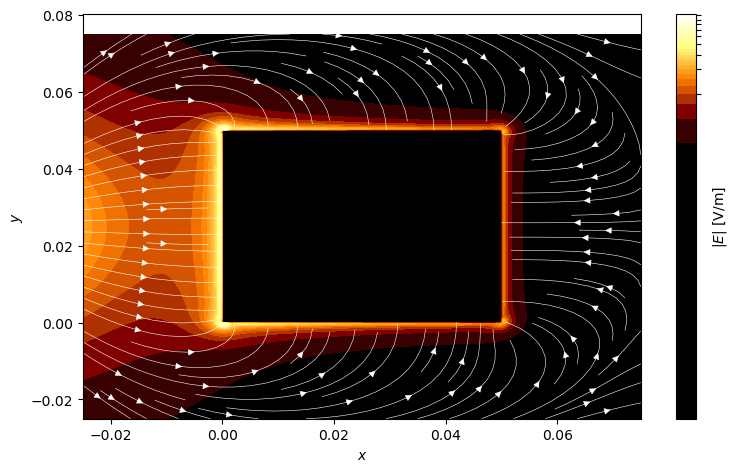

In [32]:
region = region_conductor(X,Y)
Ei, Ej = Efield2D(X,Y,Q)

Ei = Ei * region 
Ej = Ej * region 

Emod = np.sqrt(Ei**2 + Ej**2)

# py.figure(figsize = (12,7))
py.figure(figsize = (9,5.25))
my_contourf(X,Y,Emod,r'$|E|$ [V/m]','afmhot')
py.streamplot(X,Y,Ei,Ej,color = 'w',density = 1.2, linewidth = 0.4)


In [33]:
# Test. Falta mejorar este test, algún gráfico.
V(0.01,a,0,Q)

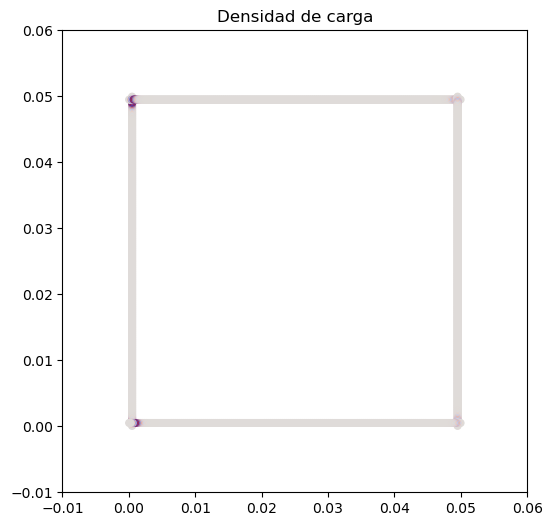

In [35]:
titulo = "Densidad de carga"
figsize = (6,6)
dq = 0.0005

# Valores entre 0 y 1 para el colormap.
qnorm = (q - np.min(q))/(np.max(q)-np.min(q))
# facecolors = plt.cm.bwr(qnorm)
facecolors = plt.cm.coolwarm(qnorm)

fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
ax.set_title(titulo)
plt.xlim([-0.01,0.06])
plt.ylim([-0.01,0.06])

for n in np.arange(qnorm.shape[0]):
    _q , xq, yq, zq = Q[n]
    # Different colors for positive and negative charges.
    circ = plt.Circle((xq,yq), dq, color=facecolors[n])
    ax.add_patch(circ)          

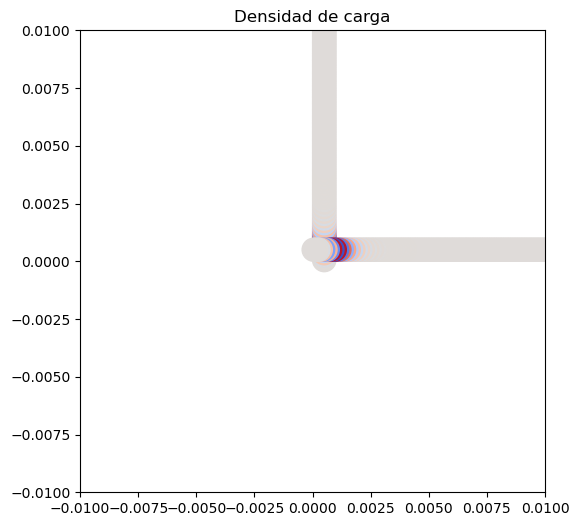

In [37]:
fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
ax.set_title(titulo)
plt.xlim([-0.01,0.01])
plt.ylim([-0.01,0.01])

for n in np.arange(qnorm.shape[0]):
    _q, xq, yq, zq = Q[n]
    # Different colors for positive and negative charges.
    circ = plt.Circle((xq,yq), dq, color=facecolors[n])
    ax.add_patch(circ)          

## Referencias

Revisar.

<a id='sadiku'>[1]</a> Sadiku, M.N.O. (2018). $\emph{Computational Electromagnetics with MATLAB}$, (4ta ed.). CRC Press. https://doi.org/10.1201/9781315151250  
<a id='gibson'>[2]</a> Gibson, W.C. (2021). $\emph{The Method of Moments in Electromagnetics}$, (3ra ed.). Chapman and Hall/CRC. https://doi.org/10.1201/9780429355509  


<!-- pp. 123-157 -->
